In [50]:
import tensorflow as tf
import keras 
import matplotlib
import numpy

In [51]:
import os

In [52]:
path = "C:\\Users\\USER\\Documents\\datasets\\Face Dataset"

In [53]:
classes = os.listdir(path)

In [54]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path,
    batch_size = 16,
    validation_split = 0.2,
    subset = "training",
    seed = 123
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path,
    batch_size = 16,
    validation_split = 0.2,
    subset = "validation",
    seed = 123
)

Found 2062 files belonging to 5 classes.
Using 1650 files for training.
Found 2062 files belonging to 5 classes.
Using 412 files for validation.


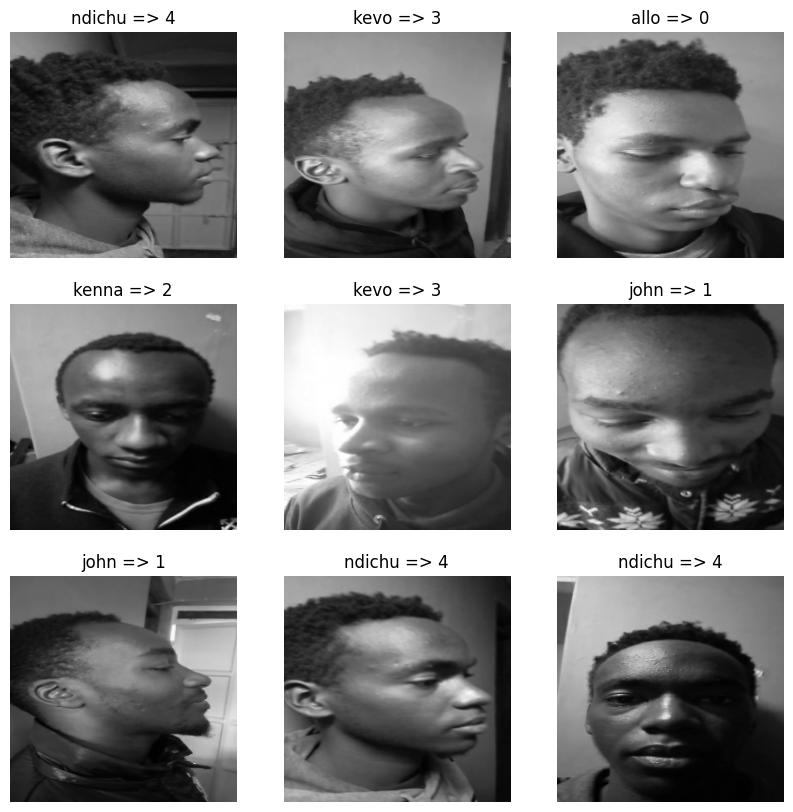

In [55]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"{classes[labels[i]]} => {labels[i]}")
    plt.axis("off")

In [56]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 256, 256, 3)
(16,)


In [57]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [58]:
from keras import layers

In [59]:
#normalization_layer = layers.Rescaling(1. / 255)

In [60]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
for image_batch, labels_batch in train_ds:
    image_batch = image_batch / 255.0

In [62]:
import numpy as np

In [63]:
first_image = image_batch[0]
np.max(first_image)

0.9778655

In [64]:
num_classes = len(class_names)

model = keras.models.Sequential()

In [65]:
#model.add(layers.Rescaling(1. / 255, input_shape = (256, 256, 3)))

In [66]:
#model.add(layers.Input(input_shape = (256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(62, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(num_classes))

In [67]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

In [68]:
len(train_ds.take(5))

5

In [69]:
"""
epochs = 5
for image_batch, labels_batch in train_ds:
    image_batch = image_batch/255.0
    history = model.fit(image_batch, labels_batch, epochs = epochs, batch_size = 16, verbose = True)

"""

'\nepochs = 5\nfor image_batch, labels_batch in train_ds:\n    image_batch = image_batch/255.0\n    history = model.fit(image_batch, labels_batch, epochs = epochs, batch_size = 16, verbose = True)\n\n'

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 2 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

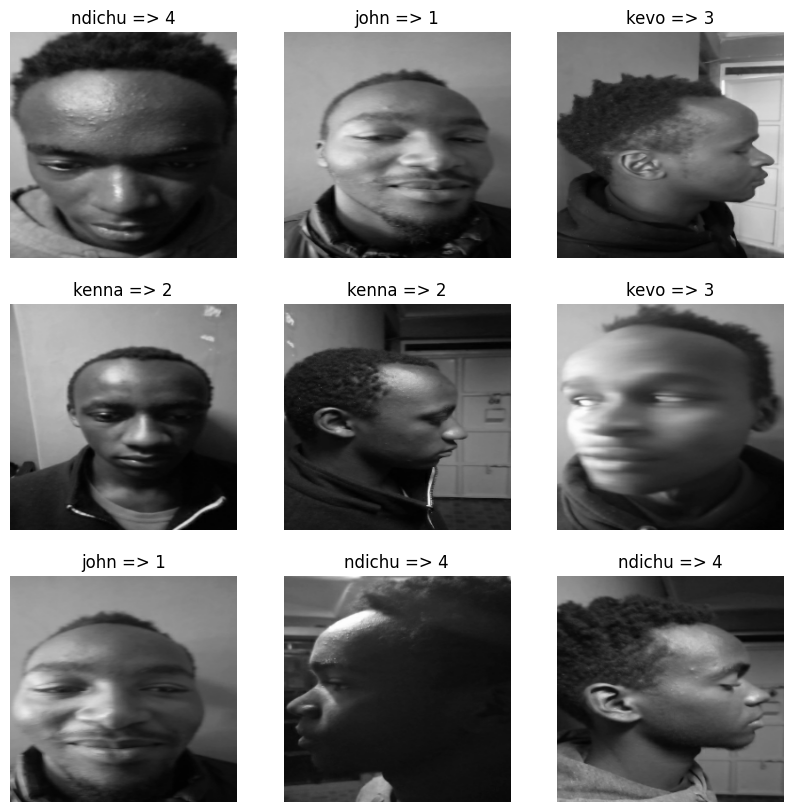

In [70]:
loop = len(train_ds)

plt.figure(figsize=(10, 10))
for x in range(loop):
    for images, labels in train_ds.take(x):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"{classes[labels[i]]} => {labels[i]}")
        plt.axis("off")

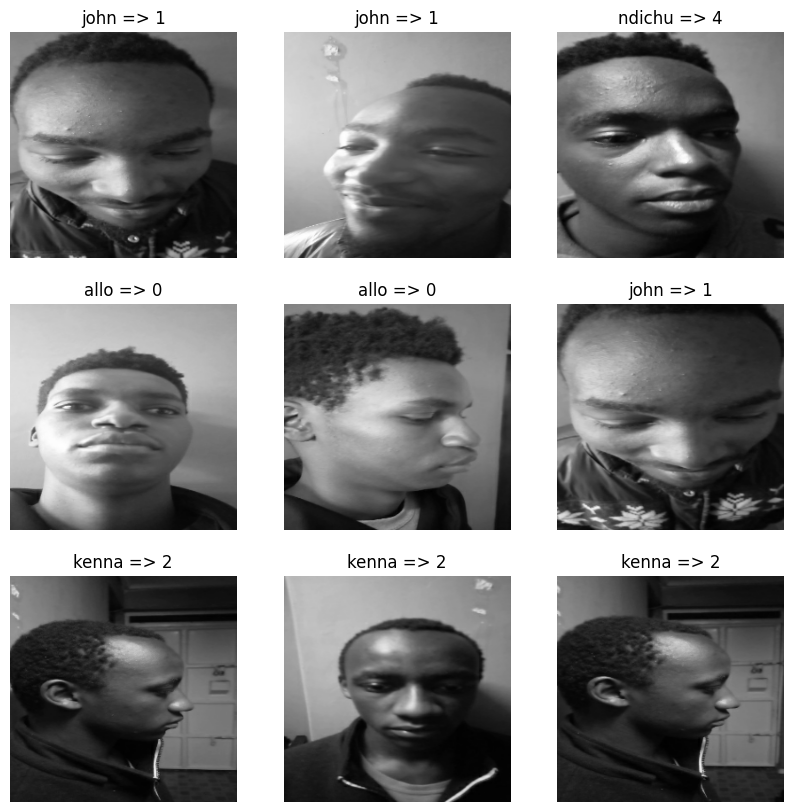

In [75]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(4):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"{classes[labels[i]]} => {labels[i]}")
    plt.axis("off")